In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import scipy as sp
from scipy import integrate

In [3]:
from plotly import tools
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

In [4]:
%matplotlib inline
sns.set({'figure.figsize':(16,8)})

## yield of maturity:

In [36]:
r = np.linspace(0.02,0.05,700)
T = 30
C = 40
c = C/2
price = 1200
par = 1000
def bondvalue(c,T,par,r):
    return c/r + (par - c/r)*((1+r)**(-2*T))

value = bondvalue(C,T,par,r)
s = sp.interpolate.UnivariateSpline(r,value,s=price)

In [37]:
xs = np.linspace(0.03,0.05,1000)
ys = s(xs)
np.where(ys>=1200)[0][-1]
xs[np.where(ys>=1200)[0][-1]],ys[np.where(ys>=1200)[0][-1]]

(0.032382382382382384, 1200.0753607711802)

In [8]:
bondvalue(C,T,par,0.03238238)

1200.4799982518277

Text(0.5, 1.0, 'par = 1000, coupon payment = 40, T = 30')

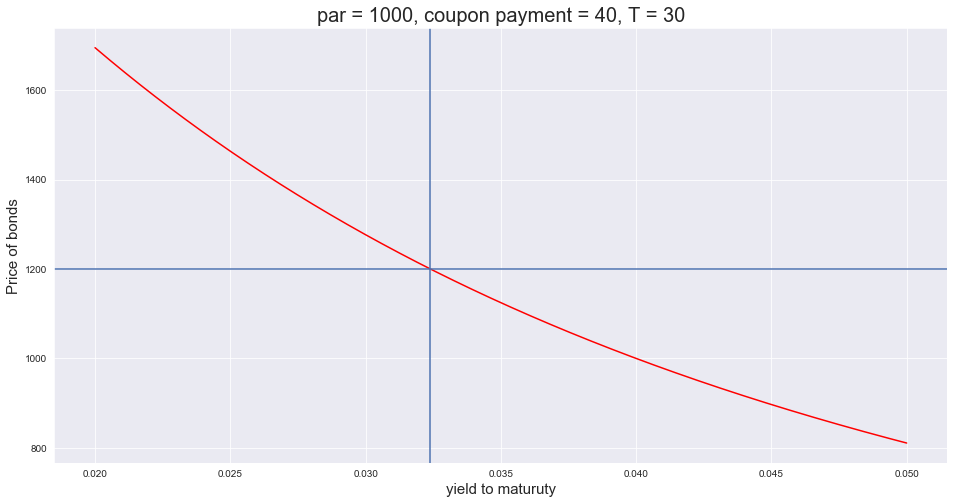

In [19]:
fig, ax = plt.subplots()
sns.lineplot(r, value, ax=ax, color='red')
ax.axvline(0.03238238)
ax.axhline(1200)
ax.set_xlabel('yield to maturuty',size=15)
ax.set_ylabel('Price of bonds',size=15)
ax.set_title('par = 1000, coupon payment = 40, T = 30', size=20)

In [17]:
plt.text?

# Exercise:

## Exo 1:
- The forward rate: $r(t) = 0.028 + 0.00042t$

$D(T) = \exp(-\int_0^Tr(t)dt)$

$y_T = \frac{1}{T}\int_0^Tr(t)dt$

In [11]:
def result_from_int_quad(func,a,b):
    result = integrate.quad(func, a, b)
    return result[0] - result[1]

In [118]:
func = lambda t:0.028 + 0.00042*t
print(f"yield to maturity of maturing in 20 years {(100/20)*result_from_int_quad(func, 0, 20):.3f}%")

yield to maturity of maturing in 20 years 3.220%


In [119]:
# What is the price of a par 1000 dolar zero-coupon bond maturing in 15 years
#y15 = (1/15)*result_from_int_quad(func, 0, 15)
#price = 1000*(1+(y15/2))**(-2*15)
price = 1000*np.exp(-result_from_int_quad(func,0,15))
price

626.7233899781476

## Exo 2:
- $r(t) = 0.04 + 0.0002t + 0.00003t^2$

In [14]:
# yield to maturity of maturing in 8 years
func = lambda t: 0.04+0.0002*t + 0.00003*(t**2)
y8 = (1/8)*result_from_int_quad(func,0,8)
y8

0.04143999999999955

In [15]:
# What is the price of a par 1000 dolar zero-coupon bond maturing in 5 years
y5 = (1/5)*result_from_int_quad(func, 0, 5)
price = 1000*(1+(y5/2))**(-2*5)
price

817.3384030227816

In [16]:
# plot the forward rate and yield curve
T = np.arange(1,100, 1)
forward_rate = [func(t) for t in T]
y = [(1/t)*result_from_int_quad(func, 0, t) for t in T]

In [36]:
data = [
    go.Scatter(
        x = T,
        y = forward_rate,
        marker = dict(
            color = 'red',
            size = 10
        ),
        name = "forward rate"
    ),
    go.Scatter(
        x = T,
        y = y,
        marker = dict(
            color = 'green',
            size = 15
        ),
        name = "yield to maturity"
    )
]
layout = go.Layout(
    title = "Forward rate vs Yield Curve",
    xaxis = dict(
        title = "Year"
    ),
    yaxis = dict(
        title = "rate"
    ),
)
fig = go.Figure(data, layout)
iplot(fig, filename="Forward rate vs yield to maturity")

Text(0.5, 1.0, 'Forward rate vs Yield')

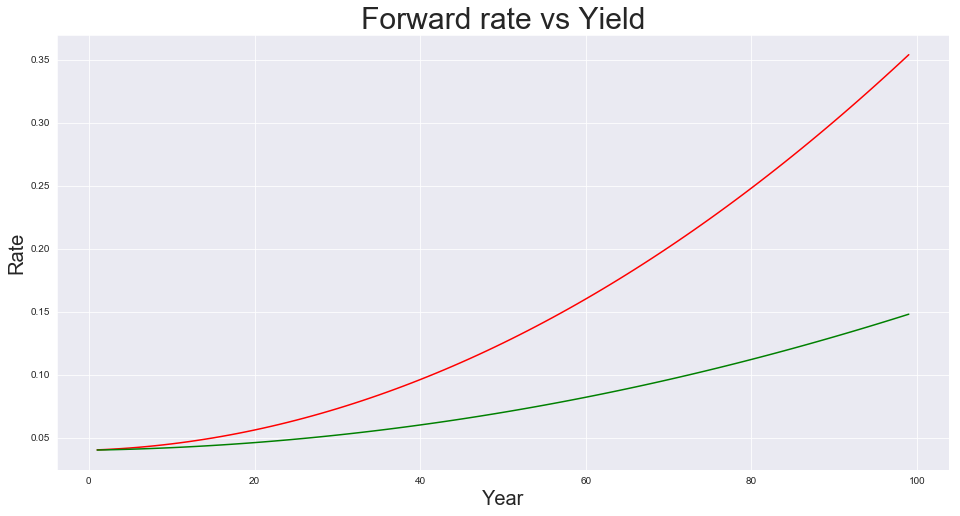

In [42]:
sns.lineplot(T, forward_rate, color='red')
sns.lineplot(T, y, color='green')
plt.xlabel("Year", size=20)
plt.ylabel("Rate", size=20)
plt.title("Forward rate vs Yield", size=30)

- Suppose you buy a 10-year zero-coupon bond and sell it after 1 year
- What will be the return? if the forward rate does not change

In [43]:
r = [func(t) for t in range(1,11)]
y = [(1/t)*result_from_int_quad(func, 0, t) for t in range(1,11)]

In [46]:
price_buy = 1000*(1+y[9])**(-10)
price_buy

662.7089111059648

In [53]:
# return if he sell the bond
price_sell = price_buy*(1+r[0])
returns = price_sell - price_buy
returns

26.660779493792916

In [54]:
# return if he hold the bond 
price_1 = price_buy*(1+y[9])
returns_1 = price_1 - price_buy
returns_1

27.83377426645029

In [55]:
# if he sell this bond instead of holding it, he will be lossing a worth
returns - returns_1

-1.1729947726573755

## Exo 3:
- coupon rate = 3%, current yield = 2.8%

In [20]:
# Is the bond selling above or below par? 
# above because the current yield < coupon rate, the different rate of both
# represent plus price of par

In [75]:
par = 1000
cpr = 0.03/2
cy = 0.028/2
T = 15
C = par*(cpr)
print(f"Coupon of bond: {C}$")
#P = (C/(0.028/2) + (1000 - (C/(0.028/2)))*(1+0.028/2)**(-1*2))
P = C/(cy)
print(f"Price of bond: {P}$")
y_grid = np.linspace(0.01,0.05,1000)

def bondvalue(c,T,par,r):
    return c/(r/2) + (par - (c/(r/2)))*((1+(r/2))**(-2*T))

value = bondvalue(C,T,par,y_grid)
s = sp.interpolate.UnivariateSpline(y_grid,value,s=P)
xs = np.linspace(0.01,0.05,1000)
ys = s(xs)
print(f"Yield of maturity: {xs[np.where(ys>=price)[0][-1]]}")
# Yield of maturity is below current yield: 0.028 because the bond is bought
# with price above par, but in maturity we recieve just par, not price of bond

Coupon of bond: 15.0$
Price of bond: 1071.4285714285713$
Yield of maturity: 0.024254254254254252


## Exo 4:
- $r(t) = 0.032 + 0.001t + 0.0002t^2$

In [121]:
# What is the 5-year continuously compounded spot rate?
func = lambda t: 0.032 + 0.001*t + 0.0002*(t**2)
y5 = (1/5)*result_from_int_quad(func, 0, 5)
print(f"5-year continuously compounded spot rate: {100*y5:.3f}%/year")

5-year continuously compounded spot rate: 3.617%/year


In [122]:
# What is the price of a zero-coupon bond that matures in 5 years?
#P = 1000*((1+y5)**(-5))
P = 1000*np.exp(-result_from_int_quad(func,0,5))
P

834.5744428455977

## Exo 5:

In [129]:
t = [0.5, 1, 1.5, 2]
y = [0.025, 0.028, 0.032, 0.033]
par = 1000
c = 35
P = []
for i in range(len(t)):
    if i==3:
        nva = (c+par)/((1+y[i])**(2*t[i]))
    else:
        nva = c/((1+y[i])**(2*t[i]))
    print(i+1,"\t\t: ",nva,"\t$")
    P.append(nva)
print(f"Price\t\t: {np.sum(P)}\t$")

1 		:  34.146341463414636 	$
2 		:  33.119350785023244 	$
3 		:  31.8440980505327 	$
4 		:  908.9480530179081 	$
Price		: 1008.0578433168787	$


## Exo 8:

In [91]:
par = 1000
T = 5
P = 828
# Price zero-coupon = par/exp(r1+...+rn) = par/(exp(n*yn))
y5 = np.log(par/P)/T
# forward rate is constant => r1+...+rn = n*yn => n*r=n*yn => r = yn
r = y5
r

0.03774842491937548

In [94]:
r1 = 0.042
P_changed_after_1_year = par/np.exp(r1+3*r)
P_changed_after_1_year

856.2051462168374

In [98]:
# returns if we sell this bond
P_changed_after_1_year - P

28.20514621683742

In [99]:
# returns if we hold the bond
(y5)*P

31.2556958332429

In [100]:
# Net return after we sell this bond
(P_changed_after_1_year - P)- (y5*P)

-3.0505496164054797

## Exo 12:
- when 8-year zero-coupon bond was purchased, $r(t) = 0.04 + 0.001t$
- after 6 month: $r(t) = 0.03 + 0.0013t$, this bond was be sold
- What is the return?

In [101]:
func1 = lambda t: 0.04 + 0.001*t
func2 = lambda t: 0.03 + 0.0013*t
y8 = result_from_int_quad(func,0,8)/8

P_8 = 1000*np.exp(-result_from_int_quad(func1,0,8))
P_7_5 = 1000*np.exp(-result_from_int_quad(func2,0,7.5))

In [137]:
returns = P_7_5 - P_8 - P_8*y8 # opportunity cost: P_8*y8
returns/P_8

0.054386423018835096

In [132]:
netReturn = (P_7_5/P_8) - 1
netReturn

0.09465308968550135

In [138]:
netReturn - y8 # opportunity cost: y8

0.05438642301883512

## Exo 22:
- continuously compounded forward rate: $r(t) = 0.022 + 0.005t − 0.004t^2 + 0.0003t^3$
- coupon bond matures 4 year with 8 coupon payments of 21$

In [153]:
# Price of coupon bond
func = lambda t: 0.022 + 0.005*t - 0.004*(t**2) + 0.0003*(t**3)
y = [(1/t)*result_from_int_quad(func,0,t) for t in np.arange(0.5,4.5,0.5)]
P = []
for i in range(len(y)):
    if i == len(y)-1:
        P.append((21+1000)*(1+y[i])**(-(i+1)))
    else:
        P.append(21*(1+y[i])**(-(i+1)))
np.sum(P)

1038.6570598091332

In [149]:
y = [(1/t)*result_from_int_quad(func,0,t) for t in np.arange(0.5,4.5,0.5)]
T = np.arange(0.5,4.5,0.5)
D = np.exp(-T*y)
cashflow = [21,21,21,21,21,21,21,1021]
P = cashflow*D
np.sum(P)

1100.8696614519156

In [156]:
# Duration of this bond
np.sum(P*T)/np.sum(P)

3.734379650453359